In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

from utils import *

In [2]:
with open('data/digits/digits_puzzle.txt', 'r') as file:
    digits_puzzle = file.readlines()
    
with open('data/digits/digits_solution.txt', 'r') as file:
    digits_solution = file.readlines()
    
digits_puzzle = np.array([x.replace('\n', '').split(' ') for x in digits_puzzle], dtype=int)
digits_solution = np.array([x.replace('\n', '').split(' ') for x in digits_solution], dtype=int)

In [3]:
digits_puzzle.shape, digits_solution.shape

((6, 81), (6, 81))

array([[0, 0, 0, 0, 8, 0, 0, 0, 9],
       [0, 0, 0, 4, 2, 6, 1, 3, 0],
       [0, 0, 0, 9, 0, 1, 5, 0, 6],
       [2, 0, 0, 8, 3, 0, 9, 7, 4],
       [3, 0, 9, 0, 6, 0, 0, 8, 0],
       [0, 0, 0, 2, 9, 4, 0, 0, 0],
       [0, 5, 6, 3, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 8, 0, 7],
       [0, 8, 4, 0, 5, 2, 0, 1, 0]])

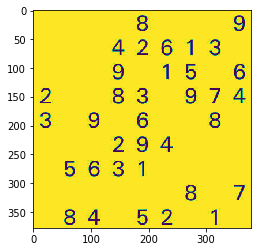

In [4]:
img = pd.read_csv('data/puzzles/easy_1.csv').values

plt.imshow(img)
digits_puzzle[0].reshape((9,9))

array([[6, 1, 2, 5, 8, 3, 7, 4, 9],
       [5, 9, 7, 4, 2, 6, 1, 3, 8],
       [4, 3, 8, 9, 7, 1, 5, 2, 6],
       [2, 6, 1, 8, 3, 5, 9, 7, 4],
       [3, 4, 9, 1, 6, 7, 2, 8, 5],
       [8, 7, 5, 2, 9, 4, 3, 6, 1],
       [7, 5, 6, 3, 1, 8, 4, 9, 2],
       [1, 2, 3, 6, 4, 9, 8, 5, 7],
       [9, 8, 4, 7, 5, 2, 6, 1, 3]])

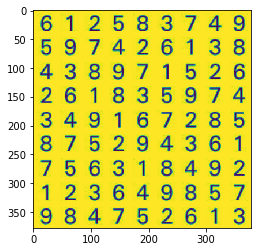

In [5]:
img = pd.read_csv('data/puzzles/easy_1_solution.csv').values

plt.imshow(img)
digits_solution[0].reshape((9,9))

In [6]:
data = []

for i in range(1, 7):

    puzzle = pd.read_csv('data/puzzles/easy_{}.csv'.format(i)).values
    solution = pd.read_csv('data/puzzles/easy_{}_solution.csv'.format(i)).values

    w, h = puzzle.shape[1]//9, puzzle.shape[0]//9
    puz_txt = digits_puzzle[i-1].reshape((9, 9))
    sol_txt = digits_solution[i-1].reshape((9, 9))

    for row in range(9):
        for col in range(9):

            puz_digit = puz_txt[row][col]
            sol_digit = sol_txt[row][col]

            puz_cell = puzzle[row*h:(row+1)*h, col*w:(col+1)*w].flatten().tolist()
            sol_cell = solution[row*h:(row+1)*h, col*w:(col+1)*w].flatten().tolist()

            data.append([puz_digit] + puz_cell)
            data.append([sol_digit] + sol_cell)

data = np.array(data)

In [7]:
data.shape

(972, 1765)

array([[6, 0, 0, 7, 0, 3, 7, 8, 4, 6, 9, 4, 0, 2, 6, 0],
       [1, 4, 0, 0, 4, 3, 1, 2, 4, 0, 0, 9, 2, 0, 6, 5],
       [7, 0, 8, 2, 1, 5, 0, 9, 1, 9, 5, 7, 0, 3, 1, 4],
       [0, 8, 0, 2, 6, 5, 3, 4, 5, 0, 0, 8, 7, 5, 4, 3],
       [0, 1, 1, 6, 3, 0, 4, 0, 5, 0, 0, 5, 6, 4, 1, 0],
       [8, 8, 3, 3, 2, 1, 0, 2, 0, 1, 5, 9, 0, 8, 3, 8],
       [1, 7, 3, 1, 7, 6, 0, 0, 6, 9, 0, 0, 0, 5, 3, 6],
       [6, 7, 2, 2, 8, 7, 4, 2, 0, 6, 3, 1, 0, 8, 7, 0],
       [8, 1, 0, 4, 0, 0, 4, 7, 9, 5, 1, 2, 7, 2, 4, 1],
       [6, 6, 9, 7, 8, 3, 6, 9, 0, 8, 4, 0, 8, 5, 3, 6],
       [0, 3, 1, 5, 4, 4, 0, 2, 1, 6, 0, 5, 0, 6, 0, 1],
       [0, 7, 2, 0, 0, 9, 7, 0, 6, 0, 6, 0, 3, 7, 4, 2],
       [3, 1, 9, 0, 8, 0, 1, 4, 6, 0, 0, 0, 8, 4, 4, 4],
       [0, 0, 4, 3, 6, 5, 8, 0, 1, 5, 7, 3, 4, 0, 2, 2],
       [5, 0, 4, 5, 0, 3, 0, 8, 0, 5, 6, 9, 8, 5, 7, 8],
       [0, 0, 0, 4, 8, 3, 4, 0, 7, 0, 1, 4, 8, 8, 8, 2]])

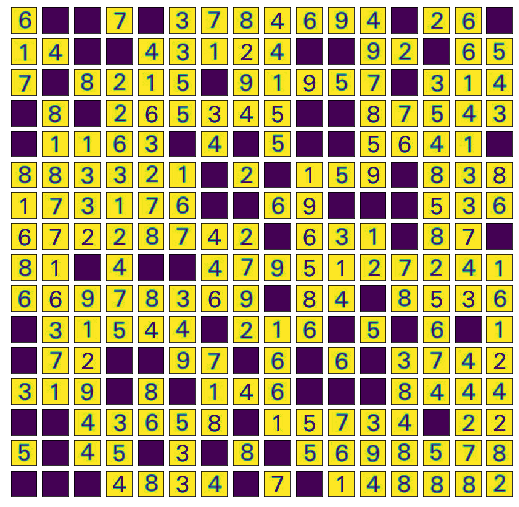

In [9]:
num_cells = 16
fig, ax = plt.subplots(num_cells, num_cells, figsize=(9, 9))

labels = []

for i in range(num_cells):
    for j in range(num_cells):
        
        idx = np.random.randint(data.shape[0])
        labels.append(data[idx][0])
        x = data[idx][1:]
        x = x.reshape((w, h))
        
        ax[i][j].imshow(x)
        ax[i][j].set_xticks([])
        ax[i][j].set_yticks([])
        
np.array(labels).reshape((num_cells, num_cells))

In [ ]:
pd.DataFrame(data).to_csv('data/digits/data.csv', index=False)